1. Download the energy usage data, per-capita-energy-use.csv Download per-capita-energy-use.csv, from Canvas and read it in. Then complete the following steps:     

Rename the column representing energy use to Energy_use.           
Remove the rows with missing country codes.         
Filter out rows where country code starts with "OWID".         
Store the resulting data frame as as an object named df_energy. 
 

2. Analyze the df_energy data frame and fill in the blanks below.

The data frame has ______ rows and ______ columns.
There are ______ unique years represented in the data frame.
 

3. Download and read in UNSD — Methodology.xlsx Download UNSD — Methodology.xlsx. After that, perform the following tasks:

Rename the last three columns as LDC, LLDC, and SIDS, respectively.           
In these three columns, replace missing values with 0 and replace "x" with 1.           
Store the resulting data as df_regions.
 

4. Merge the energy usage data with the regional classification data with a left join. Store the resulting data as merged_energy. 

 

5. Identify and display the rows in the energy data that did not find a match in the UNSD regions classification data. After that, remove rows where the tables did not find a match. Overwrite merged_energy using the resulting data frame.

The merged_energy data frame has ______ rows and ______ columns.
There are _____ unique countries/area being represented in the merged_energy data frame.
 

6. Prepare the data and create a graph to visualize the average energy usage by continent. Here are two possible ways to present the data, but feel free to choose any suitable type of chart. Make sure you chart includes appropriate labels.

Screenshot 2024-09-16 at 4.56.20 PM.png

 

7. From the line chart in part (6), we observe a significant spike in energy usage in 2022. Identify the country in each continent that experienced the largest increase in energy use per capita (in percentage terms) between 2021 and 2022. Store the resulting data frame as df_top_countries.

 

8. Identify the top five countries with the largest increase, and the five countries with the largest decrease in energy use per capita (in percentage terms) between 2021 and 2022. Store the resulting data frame as df_largest_change.

 

9. Create a graph to visualize countries with the largest change in energy use in df_largest_change. Here are a possible way to present the data, but feel free to choose any suitable type of chart. Make sure you chart includes appropriate labels.

Screenshot 2024-09-16 at 5.01.25 PM.png
 

Requirements
Answer all questions in a Python notebook and render it as an HTML file.
Your code should generate the following data frames and two required plots.
df_energy, df_regions, merged_energy, df_top_countries, df_largest_change
Submit both the Python notebook and the HTML file to Canvas by the end of Friday, Sep 20.
Note that only one attempt is allowed. So make sure you submit the correct files!

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

Rename the column representing energy use to Energy_use.           
Remove the rows with missing country codes.         
Filter out rows where country code starts with "OWID".         
Store the resulting data frame as as an object named df_energy. 

In [52]:
Energy_use = pd.read_csv("per-capita-energy-use.csv") 


In [53]:
Energy_use = Energy_use.dropna()
Energy_use.isna().sum()

Entity                                                0
Code                                                  0
Year                                                  0
Primary energy consumption per capita (kWh/person)    0
dtype: int64

In [54]:
df_energy=Energy_use[Energy_use["Code"].str.match("OWID")]
n_row , n_col = df_energy.shape
n_year=len(df_energy["Year"].unique())
print(("The data frame has {} rows and {} columns.").format(n_row,n_col))
print(("There are {} unique years represented in the data frame.").format(n_year))

The data frame has 138 rows and 4 columns.
There are 58 unique years represented in the data frame.


2. Analyze the df_energy data frame and fill in the blanks below.

The data frame has ______ rows and ______ columns.
There are ______ unique years represented in the data frame.

3. Download and read in UNSD — Methodology.xlsx Download UNSD — Methodology.xlsx. After that, perform the following tasks:

Rename the last three columns as LDC, LLDC, and SIDS, respectively.           
In these three columns, replace missing values with 0 and replace "x" with 1.           
Store the resulting data as df_regions.

In [55]:
UNSD = pd.read_excel("UNSD — Methodology.xlsx")
list = ["LDC", "LLDC", "SIDS" ]


In [89]:
for i in range(0,3):
    UNSD = UNSD.rename(columns={UNSD.columns[-i-1]:list[-i-1]})

In [85]:
# UNSD.rename(columns={UNSD.columns[-3]:"LDC",UNSD.columns[-2]:"LLDC",UNSD.columns[-1]:"SIDS" })

,Region Name,Country or Area,ISO-alpha3 Code,LDC,LLDC,SIDS
0,Asia,Afghanistan,AFG,x,x,NaN
1,Europe,Åland Islands,ALA,NaN,NaN,NaN
2,Europe,Albania,ALB,NaN,NaN,NaN
3,Africa,Algeria,DZA,NaN,NaN,NaN
4,Oceania,American Samoa,ASM,NaN,NaN,x
...,...,...,...,...,...,...
243,Oceania,Wallis and Futuna Islands,WLF,NaN,NaN,NaN
244,Africa,Western Sahara,ESH,NaN,NaN,NaN
245,Asia,Yemen,YEM,x,NaN,NaN
246,Africa,Zambia,ZMB,x,x,NaN


In [100]:
a=UNSD["LDC"][1]
print(a)

nan


In [102]:
UNSD[["LDC","LLDC","SIDS"]]=UNSD[["LDC","LLDC","SIDS"]].replace(["x",UNSD["LDC"][1]],[1,0])


C:\Users\admin\AppData\Local\Temp\ipykernel_35472\1162703300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  UNSD[["LDC","LLDC","SIDS"]]=UNSD[["LDC","LLDC","SIDS"]].replace(["x",UNSD["LDC"][1]],[1,0])


In [103]:
df_regions = UNSD

In [ ]:
df_regions

In [114]:
c = 0 
for i in Energy_use["Entity"]:
    if i in df_regions["Country or Area"]:
        c+=1
print(c)   

0


In [125]:
df_regions = df_regions.rename(columns={"ISO-alpha3 Code":"Code"})

In [126]:
df_regions.head()

,Region Name,Country or Area,Code,LDC,LLDC,SIDS
0,Asia,Afghanistan,AFG,1.0,1.0,0.0
1,Europe,Åland Islands,ALA,0.0,0.0,0.0
2,Europe,Albania,ALB,0.0,0.0,0.0
3,Africa,Algeria,DZA,0.0,0.0,0.0
4,Oceania,American Samoa,ASM,0.0,0.0,1.0


In [127]:
df_regions.set_index(['Code'])

,Region Name,Country or Area,LDC,LLDC,SIDS
Code,,,,,
AFG,Asia,Afghanistan,1.0,1.0,0.0
ALA,Europe,Åland Islands,0.0,0.0,0.0
ALB,Europe,Albania,0.0,0.0,0.0
DZA,Africa,Algeria,0.0,0.0,0.0
ASM,Oceania,American Samoa,0.0,0.0,1.0
...,...,...,...,...,...
WLF,Oceania,Wallis and Futuna Islands,0.0,0.0,0.0
ESH,Africa,Western Sahara,0.0,0.0,0.0
YEM,Asia,Yemen,1.0,0.0,0.0


In [128]:
merged_energy = Energy_use.merge(df_regions,how="left")

In [176]:
merged_energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9771 entries, 0 to 9979
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              9771 non-null   object 
 1   Code                                                9771 non-null   object 
 2   Year                                                9771 non-null   int64  
 3   Primary energy consumption per capita (kWh/person)  9771 non-null   float64
 4   Region Name                                         9771 non-null   object 
 5   Country or Area                                     9771 non-null   object 
 6   LDC                                                 9771 non-null   float64
 7   LLDC                                                9771 non-null   float64
 8   SIDS                                                9771 non-null   float64
dtypes: 

In [146]:
mismatch = merged_energy[merged_energy['LDC'].isna()]
merged_energy = merged_energy[merged_energy['LDC'].notna()]
print("The merged_energy data frame has {} rows and {}columns.".format(merged_energy.shape[0],merged_energy.shape[1]))
print(("There are {} unique countries/area being represented in the merged_energy data frame.").format(
    len(merged_energy["Country or Area"].unique())
))

The merged_energy data frame has 9771 rows and 9columns.
There are 215 unique countries/area being represented in the merged_energy data frame.


Africa
Americas
Asia
Europe
Oceania


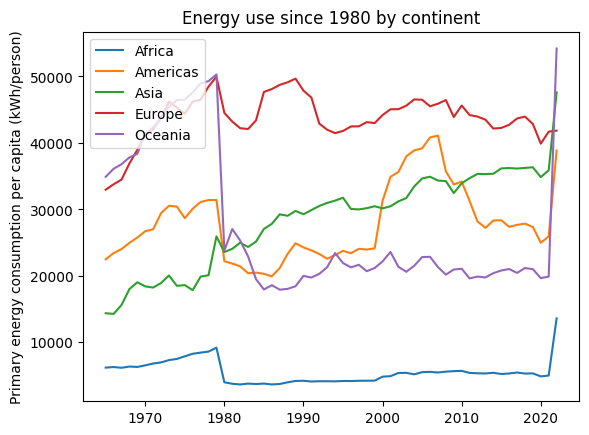

In [186]:
plot_data = merged_energy.groupby(["Region Name","Year"])[['Primary energy consumption per capita (kWh/person)']].mean().reset_index()
colors = ['red' , 'green' , 'black' , 'blue' , 'pink']
for i in plot_data["Region Name"].unique():
    print(i)
    df = plot_data[plot_data["Region Name"] == i]
    plt.plot(df["Year"],df["Primary energy consumption per capita (kWh/person)"],label = i)

plt.ylabel("Primary energy consumption per capita (kWh/person)")
plt.title("Energy use since 1980 by continent")
plt.legend(loc = "upper left")
plt.show()


In [203]:
data_2021 = merged_energy.query("Year == 2021")
data_2022 = merged_energy.query("Year == 2022").rename(columns={"Primary energy consumption per capita (kWh/person)":"energy_2022"})
energy_dif = data_2022["Primary energy consumption per capita (kWh/person)"]-data_2021["Primary energy consumption per capita (kWh/person)"]

In [225]:
data_2021 = merged_energy.query("Year == 2021").rename(columns={"Primary energy consumption per capita (kWh/person)":"energy_2021"}).set_index("Code")
data_2022 = merged_energy.query("Year == 2022").rename(columns={"Primary energy consumption per capita (kWh/person)":"energy_2022"}).set_index("Code")
data_2022.merge(data_2021,how='left')

,Entity,Year,energy_2022,Region Name,Country or Area,LDC,LLDC,SIDS,energy_2021
0,Algeria,2022,15252.127,Africa,Algeria,0.0,0.0,0.0,NaN
1,Argentina,2022,21994.422,Americas,Argentina,0.0,0.0,0.0,NaN
2,Australia,2022,63458.840,Oceania,Australia,0.0,0.0,0.0,NaN
3,Austria,2022,42685.380,Europe,Austria,0.0,0.0,0.0,NaN
4,Azerbaijan,2022,18747.918,Asia,Azerbaijan,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
73,United Kingdom,2022,30097.885,Europe,United Kingdom of Great Britain and Northern I...,0.0,0.0,0.0,NaN
74,United States,2022,78754.270,Americas,United States of America,0.0,0.0,0.0,NaN
75,Uzbekistan,2022,16929.814,Asia,Uzbekistan,0.0,1.0,0.0,NaN
76,Venezuela,2022,21683.146,Americas,Venezuela (Bolivarian Republic of),0.0,0.0,0.0,NaN


In [226]:
data_2021 = data_2021["energy_2021"]

In [227]:
data_dif = data_2022.merge(data_2021,how='left', on="Code")

In [230]:
data_dif = data_dif.reset_index()

In [231]:
data_dif["energy_dif"]=data_dif["energy_2022"]-data_dif["energy_2021"]

In [249]:
data_dif["energy_dif_PCT"]=(data_dif["energy_2022"]-data_dif["energy_2021"])/data_dif["energy_2022"]*100

In [250]:
data_dif

,Code,Entity,Year,energy_2022,Region Name,Country or Area,LDC,LLDC,SIDS,energy_2021,energy_dif,energy_dif_PCT
0,DZA,Algeria,2022,15252.127,Africa,Algeria,0.0,0.0,0.0,15914.461,-662.334,-4.342568
1,ARG,Argentina,2022,21994.422,Americas,Argentina,0.0,0.0,0.0,21328.186,666.236,3.029113
2,AUS,Australia,2022,63458.840,Oceania,Australia,0.0,0.0,0.0,61439.910,2018.930,3.181480
3,AUT,Austria,2022,42685.380,Europe,Austria,0.0,0.0,0.0,45241.050,-2555.670,-5.987226
4,AZE,Azerbaijan,2022,18747.918,Asia,Azerbaijan,0.0,1.0,0.0,18974.334,-226.416,-1.207686
...,...,...,...,...,...,...,...,...,...,...,...,...
73,GBR,United Kingdom,2022,30097.885,Europe,United Kingdom of Great Britain and Northern I...,0.0,0.0,0.0,29716.807,381.078,1.266129
74,USA,United States,2022,78754.270,Americas,United States of America,0.0,0.0,0.0,76988.750,1765.520,2.241809
75,UZB,Uzbekistan,2022,16929.814,Asia,Uzbekistan,0.0,1.0,0.0,16552.880,376.934,2.226451
76,VEN,Venezuela,2022,21683.146,Americas,Venezuela (Bolivarian Republic of),0.0,0.0,0.0,20686.414,996.732,4.596805


In [245]:
data_dif.groupby("Region Name").agg(
    max_energy_dif = ("energy_dif",'max'),
    min_energy_dif = ('energy_dif', 'min')
                                    )

,max_energy_dif,min_energy_dif
Region Name,,
Africa,320.9425,-1041.526
Americas,1765.5200,-3782.686
Asia,8747.7800,-6210.320
Europe,8947.2200,-8401.852
Oceania,2018.9300,-966.953


In [263]:
df_largest_change = data_dif[data_dif["energy_dif_PCT"].isin(data_dif.groupby("Region Name")['energy_dif_PCT'].agg("max").reset_index()["energy_dif_PCT"])]

In [274]:
data_dif[data_dif["energy_dif_PCT"].isin(data_dif.groupby("Region Name")['energy_dif_PCT'].agg("min"))]

,Code,Entity,Year,energy_2022,Region Name,Country or Area,LDC,LLDC,SIDS,energy_2021,energy_dif,energy_dif_PCT
43,MAR,Morocco,2022,6855.1104,Africa,Morocco,0.0,0.0,0.0,7236.7104,-381.6000,-5.566650
45,NZL,New Zealand,2022,44939.2700,Oceania,New Zealand,0.0,0.0,0.0,45906.2230,-966.9530,-2.151688
64,LKA,Sri Lanka,2022,4347.6360,Asia,Sri Lanka,0.0,0.0,0.0,4884.5293,-536.8933,-12.349086
68,TTO,Trinidad and Tobago,2022,107268.7340,Americas,Trinidad and Tobago,0.0,0.0,1.0,111051.4200,-3782.6860,-3.526364
71,UKR,Ukraine,2022,16309.1240,Europe,Ukraine,0.0,0.0,0.0,21459.9450,-5150.8210,-31.582450


In [260]:
data_dif[data_dif["energy_dif_PCT"].isin(data_dif.groupby("Region Name")['energy_dif_PCT'].agg(["max","min"]).reset_index()["energy_dif_PCT"])]

KeyError: 'energy_dif_PCT'

In [276]:
df_largest_change = pd.concat([df_largest_change, data_dif[data_dif["energy_dif_PCT"].isin(data_dif.groupby("Region Name")['energy_dif_PCT'].agg("min"))]])

In [280]:
df_top_countries = data_dif[data_dif["energy_dif_PCT"].isin(data_dif.groupby("Region Name")['energy_dif_PCT'].agg("max"))]

In [299]:
df_largest_change = pd.concat([data_dif.sort_values("energy_dif_PCT")[0:5],data_dif.sort_values("energy_dif_PCT",ascending= False)[0:5]])
df_largest_change = df_largest_change.sort_values("energy_dif_PCT",ascending=False)

Text(0.5, 1.0, 'Countris with the largest change in energy use , 2021-2022')

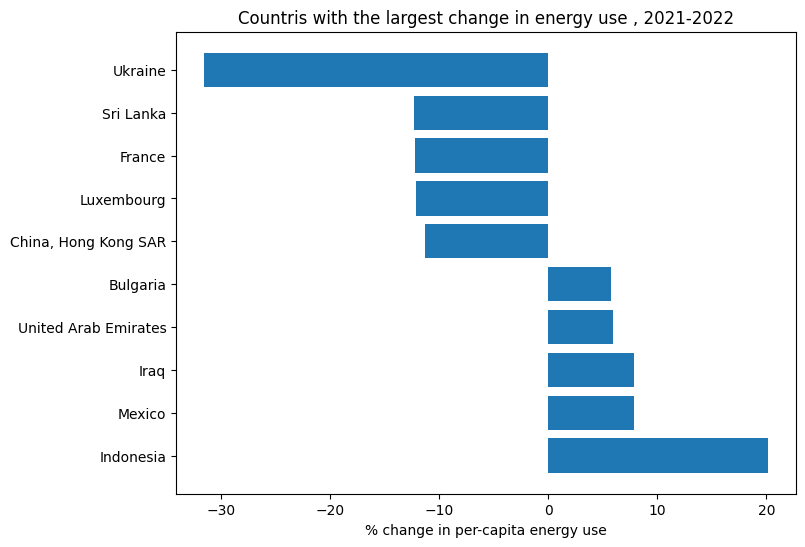

In [302]:
plt.figure(figsize=(8,6))
plt.barh(df_largest_change['Country or Area'],df_largest_change['energy_dif_PCT'])
plt.xlabel("% change in per-capita energy use")
plt.title("Countris with the largest change in energy use , 2021-2022")

,Code,Entity,Year,energy_2022,Region Name,Country or Area,LDC,LLDC,SIDS,energy_2021,energy_dif,energy_dif_PCT
64,LKA,Sri Lanka,2022,4347.636,Asia,Sri Lanka,0.0,0.0,0.0,4884.5293,-536.8933,-12.349086
22,FRA,France,2022,36051.793,Europe,France,0.0,0.0,0.0,40464.4650,-4412.6720,-12.239813


In [279]:
df_largest_change

(10, 12)

In [205]:
data_2022["Primary energy consumption per capita (kWh/person)"]

141     15252.127
325     21994.422
449     63458.840
507     42685.380
545     18747.918
          ...    
9403    30097.885
9461    78754.270
9583    16929.814
9683    21683.146
9741    12983.017
Name: Primary energy consumption per capita (kWh/person), Length: 78, dtype: float64

In [206]:
data_2021["Primary energy consumption per capita (kWh/person)"]

41        676.6956
83      14100.4320
140     15914.4610
183     35426.7000
225      2791.3318
           ...    
9740    12375.9120
9783     1937.9335
9883     1080.0393
9937     3418.8630
9979     2635.1536
Name: Primary energy consumption per capita (kWh/person), Length: 215, dtype: float64